# World Happiness Report 2023

In [678]:
import csv
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

### Use pandas to read csv file, and create a DataFrame

In [679]:
data = pd.read_csv('whr.csv')

### Query which columns have missing values

In [680]:
print(data.isnull().sum())

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
Positive affect                      24
Negative affect                      16
dtype: int64


### Check for duplicated rows

In [681]:
duplicated_rows = data[data.duplicated()]
print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
Empty DataFrame
Columns: [Country name, year, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect]
Index: []


In [682]:
sns.set(style="dark")

### Select some countries to compare

In [683]:
selected_countries = ['Afghanistan', 'France', 'Nigeria', 'Singapore', 'Syria','United Kingdom', 'Norway']

### Remove nulls from y-column values

In [684]:
data_cleaned = data.dropna(subset = 'Perceptions of corruption')

In [685]:
filtered_data = data_cleaned[data_cleaned['Country name'].isin(selected_countries)]

### Generate a scatterplot, using multiple values (years) for each country

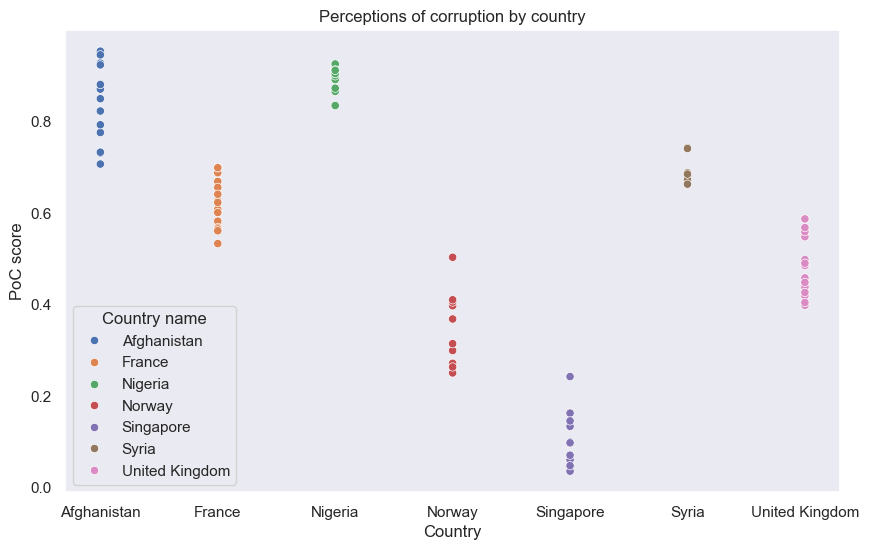

In [686]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Country name', y='Perceptions of corruption', hue='Country name', data=filtered_data)
plt.title('Perceptions of corruption by country')
plt.xlabel('Country')
plt.ylabel('PoC score')
plt.show()

### Using two variables with data averaged by country, and including a linear regression

In [687]:
data_cleaned = data.dropna(subset = 'Healthy life expectancy at birth')
selected_countries = ['Bangladesh','Benin', 'Canada', 'Japan', 'Nepal', 'Poland', 'Iraq', 'Switzerland', 'Spain', 'Venezuela']
filtered_data = data_cleaned[data_cleaned['Country name'].isin(selected_countries)]
mean_data = filtered_data.groupby('Country name').mean().reset_index()

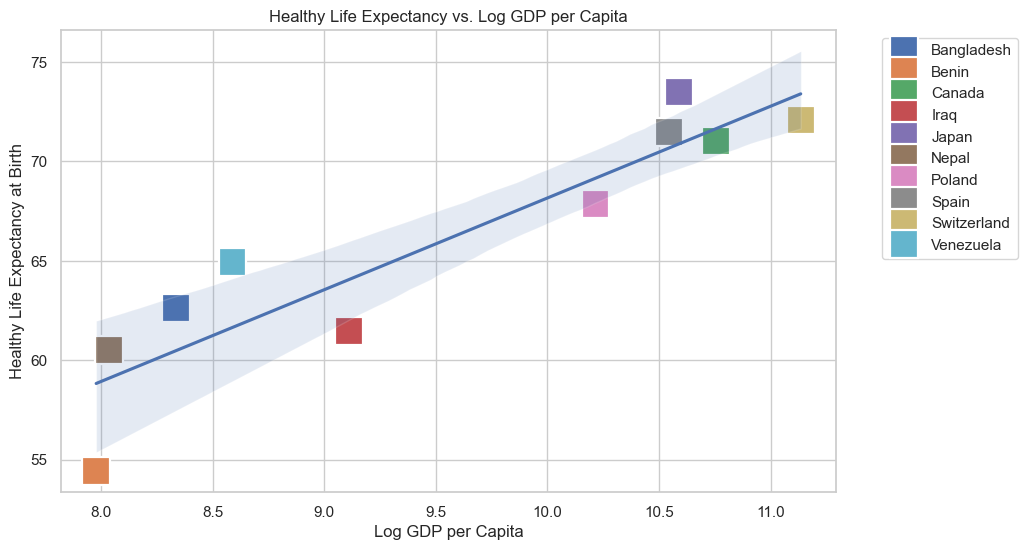

In [688]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to "whitegrid"
sns.set(style="whitegrid")

# Visualization code with blobs for each column
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='Log GDP per capita', y='Healthy life expectancy at birth', hue='Country name', data=mean_data, marker= 's', s=400)
sns.regplot(x='Log GDP per capita', y='Healthy life expectancy at birth', data=mean_data, scatter=False)




plt.title('Healthy Life Expectancy vs. Log GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Healthy Life Expectancy at Birth')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()



### Using all rows to plot a heatmap

In [689]:
data_cleaned = data.dropna(subset=['Freedom to make life choices', 'Log GDP per capita'])

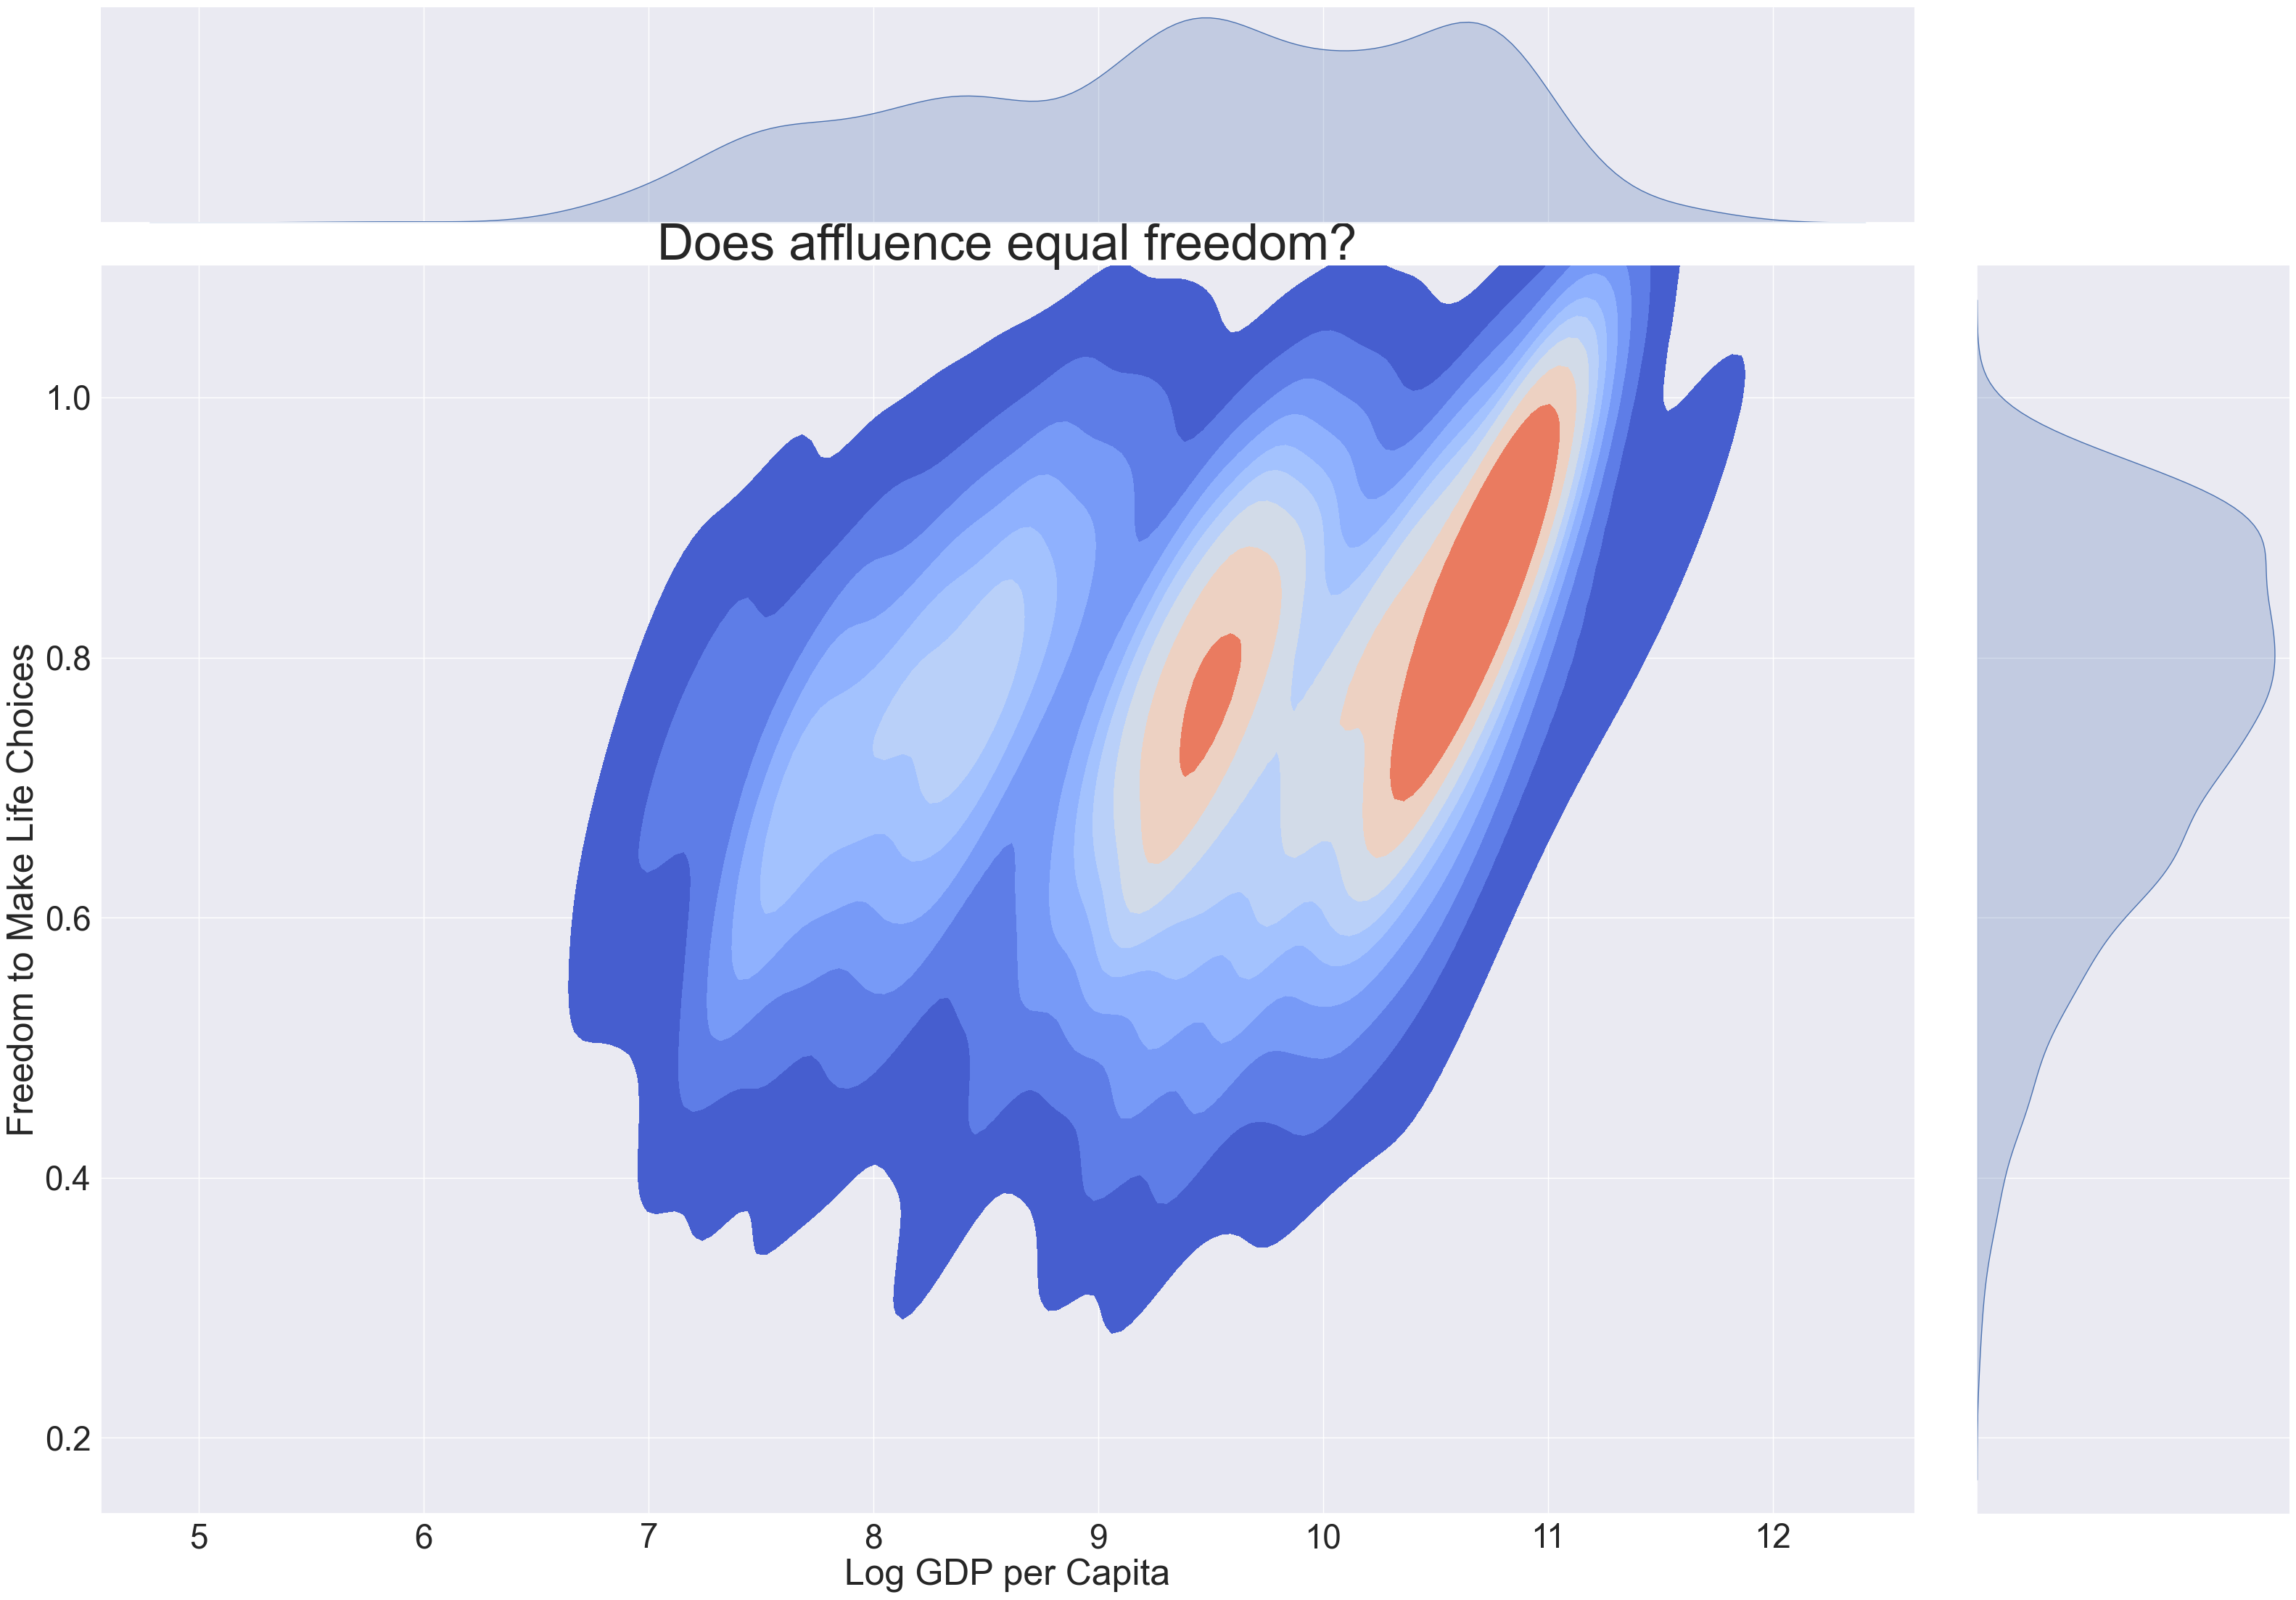

In [690]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to "whitegrid"
sns.set(style="whitegrid")
sns.set(font_scale=3)
p=sns.jointplot(x=data_cleaned['Log GDP per capita'], y=data_cleaned['Freedom to make life choices'], height=16, kind='kde', cmap='coolwarm', fill=True).set_axis_labels('Log GDP per Capita', 'Freedom to Make Life Choices')
plt.title("Does affluence equal freedom?", fontsize=50)
plt.subplots_adjust(top=1.4)
plt.subplots_adjust(right=2)
plt.show()
